## Performing multivariate imputation with MICE, KNN or Random Forests

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
# load data with numerical variables

variables = ['A2','A3','A8', 'A11', 'A14', 'A15', 'A16']

data = pd.read_csv('creditApprovalUCI.csv', usecols=variables)

data.head()

,A2,A3,A8,A11,A14,A15,A16
0,30.83,0.000,1.25,1,202.0,0,1
1,58.67,4.460,3.04,6,43.0,560,1
2,24.50,NaN,NaN,0,280.0,824,1
3,27.83,1.540,3.75,5,100.0,3,1
4,20.17,5.625,1.71,0,120.0,0,1


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((483, 6), (207, 6))

In [4]:
# find the percentage of missing data within those variables

X_train.isnull().mean()

A2     0.022774
A3     0.140787
A8     0.140787
A11    0.000000
A14    0.014493
A15    0.000000
dtype: float64

In [5]:
# let's create a MICE imputer using Bayes as estimator
imputer = IterativeImputer(estimator= BayesianRidge(),
                           max_iter=10, random_state=0)

In [6]:
imputer.fit(X_train)

IterativeImputer(add_indicator=False,
                 estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                         alpha_init=None, compute_score=False,
                                         copy_X=True, fit_intercept=True,
                                         lambda_1=1e-06, lambda_2=1e-06,
                                         lambda_init=None, n_iter=300,
                                         normalize=False, tol=0.001,
                                         verbose=False),
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [7]:
# transform the data - replace the missing values

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [8]:
pd.DataFrame(X_train).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((483, 6), (207, 6))

In [11]:
imputer_bayes = IterativeImputer(estimator=BayesianRidge(),
                                 max_iter=10,
                                 random_state=0)

imputer_knn = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5),
                                 max_iter=10,
                                 random_state=0)

imputer_nonLin = IterativeImputer(estimator=DecisionTreeRegressor(max_features='sqrt', random_state=0),
                                 max_iter=10,
                                 random_state=0)

imputer_missForest = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
                                 max_iter=10,
                                 random_state=0)

In [12]:
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


IterativeImputer(add_indicator=False,
                 estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                               criterion='mse', max_depth=None,
                                               max_features='auto',
                                               max_leaf_nodes=None,
                                               max_samples=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=2,
                                               min_weight_fraction_leaf=0.0,
                                               n_estimators=10, n_jobs=None,
                                               oob_score=False, random_state=0,
                                               verbose=0, warm_start=False),
          

In [13]:
X_train_bayes = imputer_bayes.transform(X_train)
X_train_knn = imputer_knn.transform(X_train)
X_train_nonLin = imputer_nonLin.transform(X_train)
X_train_missForest = imputer_missForest.transform(X_train)

In [14]:
predictors = [var for var in variables if var !='A16']

In [15]:
X_train_bayes = pd.DataFrame(X_train_bayes, columns = predictors)
X_train_knn = pd.DataFrame(X_train_knn, columns = predictors)
X_train_nonLin = pd.DataFrame(X_train_nonLin, columns = predictors)
X_train_missForest = pd.DataFrame(X_train_missForest, columns = predictors)

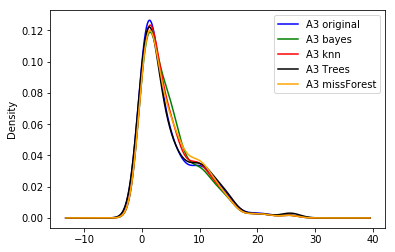

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['A3'].plot(kind='kde', ax=ax, color='blue')
X_train_bayes['A3'].plot(kind='kde', ax=ax, color='green')
X_train_knn['A3'].plot(kind='kde', ax=ax, color='red')
X_train_nonLin['A3'].plot(kind='kde', ax=ax, color='black')
X_train_missForest['A3'].plot(kind='kde', ax=ax, color='orange')

# add legends
lines, labels = ax.get_legend_handles_labels()
labels = ['A3 original', 'A3 bayes', 'A3 knn', 'A3 Trees', 'A3 missForest']
ax.legend(lines, labels, loc='best')
plt.show()